In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#Read business object and display it's columns
business_obj_loc = 'yelp_dataset/yelp_academic_dataset_business.json'
business_df = pd.read_json(business_obj_loc, lines=True)
columns = business_df.head()
columns 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
#Find missing values in business object
business_df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [5]:
#Show number of open and closed businesses
df_isopen = business_df[['is_open','business_id']].groupby(['is_open']).count()
df_isopen

,business_id
is_open,
0,30648
1,119698


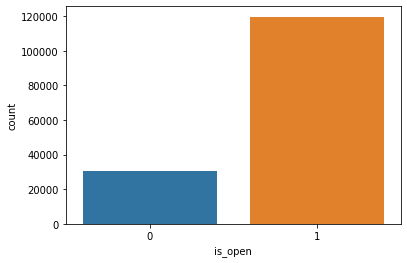

In [6]:
#Open vs closed businesses
sns.countplot(x='is_open',data=business_df)

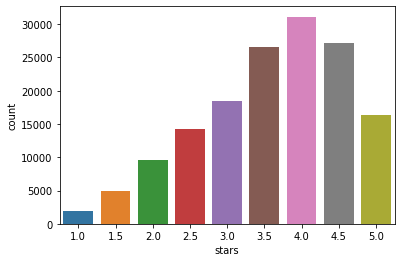

In [7]:
#Frequency of ratings
sns.countplot(x='stars',data=business_df)

In [7]:
#Nuber of businesses by city
df_by_city = business_df[['city','business_id']].groupby(['city']).count()
df_by_city.sort_values(by=['business_id'],ascending=False, inplace=True)
df_by_city[df_by_city['business_id']>1000]

,business_id
city,
Philadelphia,14569
Tucson,9250
Tampa,9050
Indianapolis,7540
Nashville,6971
New Orleans,6209
Reno,5935
Edmonton,5054
Saint Louis,4827


In [8]:
#Nuber of businesses by state
df_by_state = business_df[['state','business_id']].groupby(['state']).count()
df_by_state.sort_values(by=['business_id'],ascending=False, inplace=True)
df_by_state

,business_id
state,
PA,34039
FL,26330
TN,12056
IN,11247
MO,10913
LA,9924
AZ,9912
NJ,8536
NV,7715


In [9]:
#Show number businesses by category
df_categories = business_df[['categories','business_id']].groupby(['categories']).count()
df_categories.sort_values(by=['business_id'],ascending=False, inplace=True)
df_categories[df_categories['business_id']>400]

,business_id
categories,
"Beauty & Spas, Nail Salons",1012
"Restaurants, Pizza",935
"Nail Salons, Beauty & Spas",934
"Pizza, Restaurants",823
"Restaurants, Mexican",728
"Restaurants, Chinese",708
"Mexican, Restaurants",672
"Chinese, Restaurants",651
"Food, Coffee & Tea",508


In [ ]:
#Read reviews object and display it's columns
#This method reads the whole json object at once, but it doesn't work due to memory issue
#r_dtypes = {"stars": np.float16, 
#            "useful": np.int32, 
#            "funny": np.int32,
#            "cool": np.int32,
#           }
     
#review_obj_loc = 'yelp_dataset/yelp_academic_dataset_review.json'
#reviews_df = pd.read_json(review_obj_loc, orient="records", lines=True, dtype=r_dtypes)
#columns = review_df.head()
#columns 

In [2]:
#Read reviews object and display it's columns
#First check number of reviews pre-2016
b_pandas = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }

review_obj_loc = 'yelp_dataset/yelp_academic_dataset_review.json'
reader = pd.read_json(review_obj_loc, orient="records", lines=True, dtype=r_dtypes, chunksize=1000)

for chunk in reader:
    reduced_chunk = chunk.query("`date` < '2016-01-01'")
    reduced_chunk = reduced_chunk.replace(',',';')
    b_pandas.append(reduced_chunk)
    
reviews_df_pre_2016 = pd.concat(b_pandas, ignore_index=True)

#Write File to csv
reviews_df_pre_2016.to_csv('reviews_df_pre_2016', sep=',')

count_row = reviews_df_pre_2016.shape[0]
print('There are  ' + str(count_row) + ' reviews before 2016-01-01')

There are  2393293 reviews before 2016-01-01


In [3]:
#Read reviews object and display it's columns
#Check number of reviews between-2016 and 2018
b_pandas = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }

review_obj_loc = 'yelp_dataset/yelp_academic_dataset_review.json'
reader = pd.read_json(review_obj_loc, orient="records", lines=True, dtype=r_dtypes, chunksize=1000)

for chunk in reader:
    reduced_chunk = chunk.query("`date` >= '2016-01-01' and `date` < '2018-01-01'")
    reduced_chunk = reduced_chunk.replace(',',';')
    b_pandas.append(reduced_chunk)
    
reviews_df_2016_2018 = pd.concat(b_pandas, ignore_index=True)

#Write File to csv
reviews_df_2016_2018.to_csv('reviews_2016_2018', sep=',')

count_row = reviews_df_2016_2018.shape[0]
print('There are  ' + str(count_row) + ' reviews after 2016-01-01 and before 2018-01-01')

There are  1578930 reviews after 2016-01-01 and before 2018-01-01


In [2]:
#Read reviews object and display it's columns
#Check number of reviews after 2018
b_pandas = []
r_dtypes = {"stars": np.float16, 
            "useful": np.int32, 
            "funny": np.int32,
            "cool": np.int32,
           }

review_obj_loc = 'yelp_dataset/yelp_academic_dataset_review.json'
reader = pd.read_json(review_obj_loc, orient="records", lines=True, dtype=r_dtypes, chunksize=1000)

for chunk in reader:
    reduced_chunk = chunk.query("`date` >= '2018-01-01'")
    reduced_chunk = reduced_chunk.replace(',',';')
    b_pandas.append(reduced_chunk)
    
reviews_df_2018 = pd.concat(b_pandas, ignore_index=True)

#Write File to csv
reviews_df_2018.to_csv('reviews_df_2018', sep=',')

count_row = reviews_df_2018.shape[0]
print('There are  ' + str(count_row) + ' reviews on or after 2018-01-01')

There are  3018057 reviews on or after 2018-01-01


In [3]:
columns = reviews_df_2018.head()
columns 

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4.0,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
2,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5.0,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38
3,E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5.0,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27 23:03:21
4,A4n4YaE-owOVgTQcrVqHUw,S7bjj-L07JuRr-tpX1UZLw,I6L0Zxi5Ww0zEWSAVgngeQ,4.0,0,0,0,The cafe was extremely cute. We came at 8am an...,2018-07-07 20:50:12


In [3]:
#Read a selected city reviews from csv file 
#Prerequisite: run Recommender.ipynb
reviews_selected_Restaurants = pd.read_csv('reviews_selected_city_restaurants_Clean.csv')

In [4]:
reviews_selected_Restaurants.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,elqRpX9T3YwL07uLNtN3Bg,|sryo4gDYxbZ1T5Bz4l5Bw,ltBBYdNzkeKdCNPDAsxwAA,2,0,0,0,least give restaurant two stars due decent foo...,2015-02-02 4:29
1,1,E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5,0,0,0,amazing biscuits fill blank great cocktails...,2018-04-27 23:03
2,2,qGQvUHmC02PAZW3H1WTIfw,RRTQpg8hutdimzAYuP_Hbw,eaJCpC6IhYphj7bwCDHTwQ,5,0,0,0,stopped sunday morning walk park great food c...,2015-08-30 13:41
3,3,67cGcRrS0jTvB8p7rpaPew,8YSxVaD203mE_9FR4nCEVA,oQ5CPRt0R3AzFvcjNOqB1w,3,1,0,0,honestly food knock socks people seem love pla...,2016-01-17 13:26
4,4,xumAI7br1X67OY_bU_Yqhg,jEmClJb6wjfDUksVMO_Jjg,X_E7U2lVNEwbH_gpOBmAHQ,5,0,0,0,place chill relaxing come back it will defin...,2017-06-17 17:46


In [5]:
#Nuber of reviews by business
reviews_by_business = reviews_selected_Restaurants[['business_id','review_id']].groupby(['business_id']).count()
reviews_by_business.sort_values(by=['review_id'],ascending=False, inplace=True)
reviews_by_business = reviews_by_business.rename(columns={'review_id': 'nbr_of_reviews'})
reviews_by_business[reviews_by_business['nbr_of_reviews']>2000]

,nbr_of_reviews
business_id,
GXFMD0Z4jEVZBCsbPf4CTQ,6160
1b5mnK8bMnnju_cvU65GqQ,4247
VAeEXLbEcI9Emt9KGYq9aA,3105
C9K3579SJgLPp0oAOM29wg,2909
oIH5YWPy_g61YXM6R900Wg,2794
xlMQBBt9wrtahdqiRDcVSg,2618
OWOOc0YjU_kioLeEgo5VCA,2480
6Pu5MKIWbn6FO-oebSSrYQ,2339
3iUCCf1FWmjlFbGYvBgf9w,2240


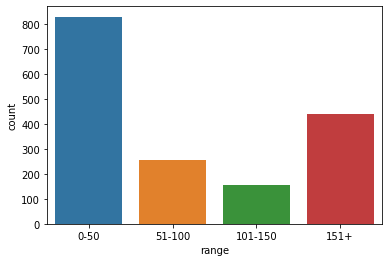

In [6]:
#Frequency of reviews
#reviews_by_business['range'] = pd.cut(reviews_by_business.nbr_of_reviews, bins=[0,11,101,1001,10001], labels=["0-10","11-100","101-1000","1001+"])
reviews_by_business['range'] = pd.cut(reviews_by_business.nbr_of_reviews, bins=[0,51,101,151,10000], labels=["0-50","51-100","101-150","151+"])
#reviews_by_business['range'] = pd.cut(reviews_by_business.nbr_of_reviews,50)
sns.countplot(x='range',data=reviews_by_business)

In [7]:
#Frequency of reviews
reviews_by_business_grouped = reviews_by_business[['range','nbr_of_reviews']].groupby(['range']).count()
reviews_by_business_grouped = reviews_by_business_grouped.rename(columns={'nbr_of_reviews': 'nbr_of_business'})
#reviews_by_business_grouped.sort_values(by=['nbr_of_reviews'],ascending=False, inplace=True)
reviews_by_business_grouped

,nbr_of_business
range,
0-50,831
51-100,256
101-150,154
151+,440


In [39]:
#Desciptive statistics about number of reviews by business
reviews_by_business['nbr_of_reviews'].describe()

count    1681.000000
mean      158.616300
std       336.965962
min         5.000000
25%        20.000000
50%        53.000000
75%       159.000000
max      6160.000000
Name: nbr_of_reviews, dtype: float64

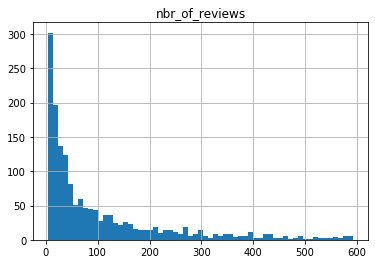

In [8]:
#Note: Number of businesses decreases exponentially with number of reviews
hist = reviews_by_business[reviews_by_business['nbr_of_reviews']<600].hist(bins=61)

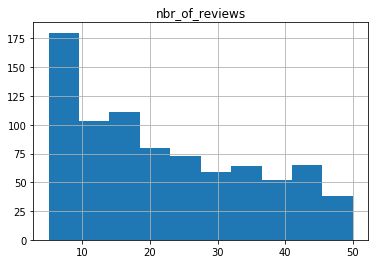

In [9]:
hist = reviews_by_business[reviews_by_business['nbr_of_reviews'] <=50].hist()

In [10]:
#Nuber of reviews by year
reviews_selected_Restaurants['year'] = reviews_selected_Restaurants['date'].str[:4]
reviews_by_year = reviews_selected_Restaurants[['year','review_id']].groupby(['year']).count()
reviews_by_year = reviews_by_year.rename(columns={'review_id': 'nbr_of_reviews'})
reviews_by_year

,nbr_of_reviews
year,
2005,4
2006,79
2007,356
2008,1275
2009,1411
2010,2731
2011,5524
2012,7155
2013,10185


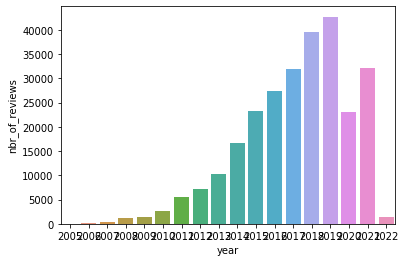

In [11]:
#Number of reviews by year: 2018-2019 have highest number of reviews
#There is a drop in 2020 due to Covid
reviews_by_year = reviews_by_year.reset_index()
sns.barplot(data=reviews_by_year,x='year',y='nbr_of_reviews')

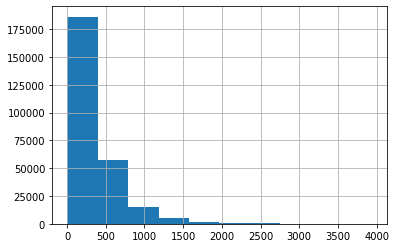

In [27]:
#Find number of characters in a review
def count_text(string_input):
    string_input = str(string_input)
    nbr_chars = len(string_input)
    return nbr_chars


reviews_selected_Restaurants['nbr_characters'] = reviews_selected_Restaurants['text'].apply(count_text)
hist = reviews_selected_Restaurants['nbr_characters'].hist()

In [38]:
#Desciptive statistics about number of characters
#Note that minimum number of charactes is 3, with mean = 360
#Number of characters in 1st quartile = 149
reviews_selected_Restaurants['nbr_characters'].describe()

count    266634.000000
mean        360.022810
std         331.079678
min           3.000000
25%         149.000000
50%         255.000000
75%         452.000000
max        3936.000000
Name: nbr_characters, dtype: float64